# Multiple Regression
 Multiple Linear Regression describes how a single response variable Y depends
linearly on a number of predictor variables.  
The basic examples where Multiple Regression can be used are as follows:
1. The selling price of a house can depend on the desirability of the location, the number of bedrooms, the number of bathrooms, the year the house was built, the square footage of the lot and a number of other factors.
2. The height of a child can depend on the height of the mother, the height of the father, nutrition, and environmental factors.  

The general mathematical equation for multiple regression is <br>
𝑦 = 𝑎 + 𝑏1𝑥1 + 𝑏2𝑥2 + ⋯ + 𝑏𝑛𝑥𝑛
Where,
* $y$ is the response variable.
* $a, b1, b2,.. ,bn$ are the coefficients.
* $x1, x2,...., x3$ are the predictor variables

### Creating Multiple Regression Model
We can use lm() function to create the relationship model between the predictor and the
response variable.  
**Syntax**  
The basic syntax for `lm()` function in multiple regression is `𝑙𝑚(𝑦~𝑥1 + 𝑥2 + ⋯ , 𝑑𝑎𝑡𝑎)`.<br> 
Following is the description of the parameters used
* **formula** is a symbol presenting the relation between the response variable and predictor variables.
* **data** is the vector on which the formula will be applied

In [1]:
#Example : We will use the mtcars data base with parameters miles per gallon (mpg), displacement (disp), horse power (hp) and weight (wt) as follows:
input=mtcars[c("mpg","disp","hp","wt")]
print(head(input))

                   mpg disp  hp    wt
Mazda RX4         21.0  160 110 2.620
Mazda RX4 Wag     21.0  160 110 2.875
Datsun 710        22.8  108  93 2.320
Hornet 4 Drive    21.4  258 110 3.215
Hornet Sportabout 18.7  360 175 3.440
Valiant           18.1  225 105 3.460


In [2]:
#Creating the multiple regression model
 model=lm(mpg~disp+hp+wt, data = input)

# Show the model
print(model)


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  



We can also get coefficient of each attribute by mentioning the index

In [3]:
coef(model)[3]

hp 
-0.03115655

In [4]:
coef(model)[4]

wt 
-3.800891

In [5]:
coef(model)[2]

disp 
-0.0009370091

In [6]:
coef(model)[1]

(Intercept) 
   37.10551

Once the model is created it can be used to predict the data.

In [7]:
#Example: for car with disp=221, hp=102 and wt=2.91 predict the mileage.
df=data.frame(disp=221, hp=102, wt=2.91) #creating dataframe for prediction
res=predict(model, df)
res

1 
22.65987

In [8]:
#predicting mileage for multiple cars
disp=c(221,232,243,223,234)
hp=c(102,109,139,123,132)
wt=c(2.91,3.43,4.32,1.76,3.35)
df=data.frame(disp, hp, wt)
res=predict(model,df)
res

1        2        3        4        5 
22.65987 20.45500 16.12720 26.37473 20.04060

### Acccuracy Measures
In multiple linear regression model can be assessed by examining the R-squared (R2) and
Residual Standard Error (RSE).
R2 represents the correlation coefficient between the observed values of the outcome variable (y)
and the fitted (i.e., predicted) values of y. For this reason, the value of R will always be positive
and will range from zero to one.
R2 represents the proportion of variance, in the outcome variable y, that may be predicted by
knowing the value of the x variables. An R2 value close to 1 indicates that the model explains a
large portion of the variance in the outcome variable.
Residual Standard Error (RSE), or sigma:
The RSE estimate gives a measure of error of prediction. The lower the RSE, the more accurate
the model (on the data in hand).
The error rate can be estimated by dividing the RSE by the mean outcome variable:<br>
`sigma(model)/mean(dataframe $ response attributes)`

In [9]:
#Finding RSE for above model
sigma(model)

[1] 2.63893

In [10]:
#Percentage Error
sigma(model)*100/mean(input$mpg)

[1] 13.13513

**Problem 1 : Build a model for estimating sales based on the advertising budget invested in youtube, facebook, and newspaper.**

In [11]:
# Loading the data
data('marketing',package='datarium')
head(marketing,5)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48


In [12]:
# Creating the model
model=lm(sales ~ youtube + facebook + newspaper, data = marketing)
print(model)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Coefficients:
(Intercept)      youtube     facebook    newspaper  
   3.526667     0.045765     0.188530    -0.001037  



In [13]:
# RSE
sigma(model)

[1] 2.022612

In [14]:
#Percentage Error
sigma(model)*100/mean(marketing$sales)

[1] 12.02004

In our multiple regression example, the RSE is 2.023 corresponding to 12% error rate.

In [15]:
# To Find RSE and RS we can Use Summary(Model) as follows:
summary(model)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5932  -1.0690   0.2902   1.4272   3.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.526667   0.374290   9.422   <2e-16 ***
youtube      0.045765   0.001395  32.809   <2e-16 ***
facebook     0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.023 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


In our example, with youtube and facebook predictor variables, the adjusted R2 = 0.89, meaning
that “89% of the variance in the measure of sales can be predicted by youtube and facebook
advertising budgets.

**Some Interpretation of above Model:**<br>
For a given the predictor, the t-statistic evaluates whether or not there is significant association
between the predictor and the outcome variable, that is whether the beta coefficient of the predictor
is significantly different from zero.
It can be seen that, changing in youtube and facebook advertising budget are significantly
associated to changes in sales while changes in newspaper budget is not significantly associated
with sales.
For a given predictor variable, the coefficient (b) can be interpreted as the average effect on y of a
one unit increase in predictor, holding all other predictors fixed.
For example, for a fixed amount of youtube and newspaper advertising budget, spending an
additional 1 000 dollars on facebook advertising leads to an increase in sales by approximately
0.1885*1000 = 189 sale units, on average.
The youtube coefficient suggests that for every 1 000 dollars increase in youtube advertising
budget, holding all other predictors constant, we can expect an increase of 0.045*1000 = 45 sales
units, on average.
We found that newspaper is not significant in the multiple regression model. This means that, for
a fixed amount of youtube and newspaper advertising budget, changes in the newspaper
advertising budget will not significantly affect sales units.
As the newspaper variable is not significant, it is possible to remove it from the model


### Confidence Interval
we use `confint(model)` function to find the confidence interval.

In [16]:
#Example : Finding confidence interval for the above problem
confint(model)

,2.5 %,97.5 %
(Intercept),2.78851474,4.26481975
youtube,0.04301371,0.04851558
facebook,0.17154745,0.20551259
newspaper,-0.01261595,0.01054097


**Problem 2 :A Multiple regression model with three predictor variables. Now you can use age and weight(body weight in
kilogram) and HBP(hypertension) as predcitor variables.**

In [17]:
install.packages("moonBook") # For Radial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library("moonBook")

In [19]:
head(radial)

,male,age,height,weight,HBP,DM,smoking,TC,TG,HDL,LDL,hsCRP,NTAV,PAV,sex
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,0,66,154,57,0,0,non-smoker,198,141,45,116,0.37,49.94000,20.26210,F
2,0,67,149,48,1,0,smoker,220,55,62,128,0.04,56.77000,21.45340,F
3,0,76,161,55,0,0,non-smoker,163,54,54,88,0.09,67.78000,20.08892,F
4,0,68,157,60,1,0,non-smoker,165,45,44,99,1.44,60.04808,19.01934,F
5,1,73,163,60,1,0,ex-smoker,241,272,34,142,0.95,69.56731,27.93436,M
6,0,65,150,65,0,0,non-smoker,166,62,34,111,0.06,51.98000,30.82488,F


In [20]:
model=lm(NTAV~age*weight*HBP, data=radial)
summary(model)


Call:
lm(formula = NTAV ~ age * weight * HBP, data = radial)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.453 -14.125  -3.226   7.724  88.126 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)      64.11678  155.82328   0.411    0.682
age              -0.67650    2.47339  -0.274    0.785
weight           -0.39685    2.37886  -0.167    0.868
HBP            -101.94261  238.52253  -0.427    0.670
age:weight        0.01686    0.03804   0.443    0.658
age:HBP           1.27972    3.64467   0.351    0.726
weight:HBP        1.52494    3.75529   0.406    0.685
age:weight:HBP   -0.01666    0.05777  -0.288    0.774

Residual standard error: 22.8 on 107 degrees of freedom
Multiple R-squared:  0.1626,	Adjusted R-squared:  0.1078 
F-statistic: 2.967 on 7 and 107 DF,  p-value: 0.006982


In [21]:
# Percentage Error
(sigma(model)/mean(radial$NTAV))*100

[1] 33.12124

From the analysis result, we can get the regression equation for a patient without
hypertension(HBP=0) and body weight 60kg: the intercept is 64.12+(-0.39685*60) and the slope
is -0.67650+(0.01686*60). The equation for a patient with hypertension(HBP=1) and same body
weight: the intercept is 64.12+(-0.39685*60-101.94) and the slope is -
0.67650+(0.01686*60)+1.27972+(-001666*60).

### Data Visualization
Visualizing the above results using `ggiraphExtra`.

In [22]:
install.packages("ggiraphExtra")
library("ggiraphExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggiraphExtra’


The following objects are masked from ‘package:moonBook’:

    addLabelDf, getMapping




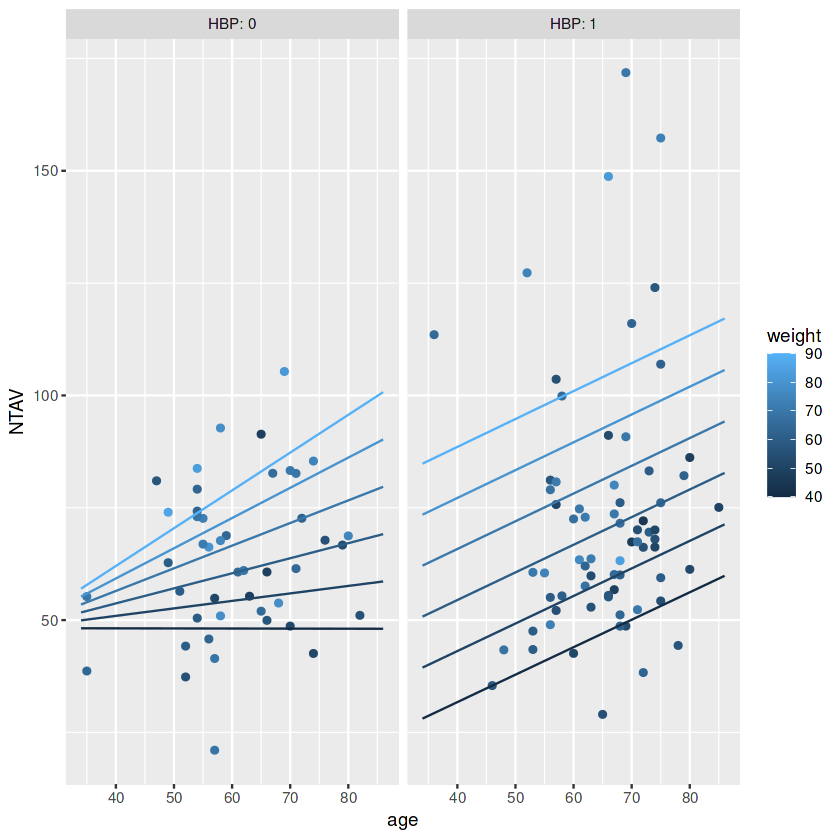

In [23]:
ggPredict(model)

### Assumptions of Linear Regression
The assumptions of normality, linearity, homoscedasticity, and absence of multicollinearity as described below:
1. Normality: In order to make valid inferences from your regression, the residuals of the
regression should follow a normal distribution. The residuals are simply the error terms, or the
differences between the observed value of the dependent variable and the predicted value.
2. Homoscedasticity: Homoscedasticity refers to whether these residuals are equally distributed,
or whether they tend to bunch together at some values, and at other values, spread far apart.
3. Linearity means that the predictor variables in the regression have a straight-line relationship
with the outcome variable. If your residuals are normally distributed and homoscedastic, you do
not have to worry about linearity.
4. Multicollinearity refers to when your predictor variables are highly correlated with each other.
This is an issue, as your regression model will not be able to accurately associate variance in
your outcome variable with the correct predictor variable, leading to muddled results and
incorrect inferences. Keep in mind that this assumption is only relevant for a multiple linear
regression, which has multiple predictor variables. If you are performing a simple linear
regression (one predictor), you can skip this assumption.


Define the Homoscendasticity<br>
The End